In [1]:
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key="my_api_key",
)
message = client.messages.create(
    model="claude-2.1",
    max_tokens=1000,
    temperature=0,
    system="你是一个代码专家，可以熟练地使用大量编程语言和相关知识。",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "请写一段python代码将下面的tex表格中的内容转换为dataframe,并将表格中的度分秒数据转换为弧度。\n\\begin{table}[h]\n    \\begin{center}\n        \\begin{tabular}{|c|c|c|c|c|c|}\n        \\hline\n        \\(\\lambda \\ (nm)\\)&404.66 & 435.84 & 496.16 & 546.07 & 576.96 \\\\\n        \\hline\n        \\(\\theta\\)&320°12'&320°30'&320°53'&321°13'&321°20'\\\\\n        \\hline\n        \\(\\theta'\\)&140°12'&140°30'&140°52'&141°11'&141°18'\\\\\n        \\hline\n        \\(\\delta\\)&39°48'&39°30'&39°07'&38°45'&38°41'\\\\\n        \\hline\n        \\end{tabular}\n        \\caption{汞灯谱线最小偏向角数据}\n    \\end{center}\n\\end{table}\\\\"
                }
            ]
        },
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": "以下是将 LaTeX 表格转换为 pandas DataFrame 并将度分秒数据转换为弧度的 Python 代码：\n\n```python\nimport pandas as pd\nimport re\nimport math\n\ndef dms_to_radians(dms_str):\n    parts = re.split(r'[°\\'\\\"]', dms_str)\n    degrees = int(parts[0])\n    minutes = int(parts[1]) if len(parts) > 1 else 0\n    seconds = int(parts[2]) if len(parts) > 2 else 0\n    \n    decimal_degrees = degrees + minutes / 60 + seconds / 3600\n    radians = math.radians(decimal_degrees)\n    return radians\n\ndata = {\n    'λ (nm)': [404.66, 435.84, 496.16, 546.07, 576.96],\n    'θ': ['320°12\\'', '320°30\\'', '320°53\\'', '321°13\\'', '321°20\\''],\n    'θ\\'': ['140°12\\'', '140°30\\'', '140°52\\'', '141°11\\'', '141°18\\''],\n    'δ': ['39°48\\'', '39°30\\'', '39°07\\'', '38°45\\'', '38°41\\'']\n}\n\ndf = pd.DataFrame(data)\n\ndf['θ (rad)'] = df['θ'].apply(dms_to_radians)\ndf['θ\\' (rad)'] = df['θ\\''].apply(dms_to_radians)\ndf['δ (rad)'] = df['δ'].apply(dms_to_radians)\n\nprint(df)\n```\n\n输出结果：\n\n```\n   λ (nm)        θ       θ'       δ   θ (rad)  θ' (rad)   δ (rad)\n0  404.66  320°12'  140°12'  39°48'  5.588997  2.447694  0.694498\n1  435.84  320°30'  140°30'  39°30'  5.592543  2.450840  0.689298\n2  496.16  320°53'  140°52'  39°07'  5.596961  2.454856  0.682948\n3  546.07  321°13'  141°11'  38°45'  5.600855  2.458348  0.676772\n4  576.96  321°20'  141°18'  38°41'  5.602077  2.459570  0.675297\n```\n\n代码解释：\n\n1. 首先定义了一个 `dms_to_radians` 函数，用于将度分秒格式的字符串转换为弧度。它使用正则表达式将字符串拆分为度、分、秒三部分，然后计算出对应的十进制度数，最后使用 `math.radians` 函数将其转换为弧度。\n\n2. 创建一个字典 `data`，包含表格中的数据。\n\n3. 使用 `pd.DataFrame` 将字典转换为 DataFrame。\n\n4. 对 DataFrame 中的 'θ'、'θ\\'' 和 'δ' 列应用 `dms_to_radians` 函数，将度分秒格式的数据转换为弧度，并将结果存储在新的列中。\n\n5. 最后，打印转换后的 DataFrame。\n\n这样就完成了将 LaTeX 表格转换为 DataFrame 并将度分秒数据转换为弧度的过程。"
                }
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "根据公式：\nn_\\lambda=\\frac{n_0}{\\sin(A/2)}\\sin(\\frac{\\delta_{min}+A}{2})\n其中 n_0=1.00027 A=60°1'\n计算上述的各个波长对应的\\delta计算出的n_\\lambda,并以此绘图\n其中n_lambda为折射率，lambda为波长\n"
                }
            ]
        },
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": "根据给定的公式和数据，我们可以计算出各个波长对应的折射率 n_λ，并绘制折射率与波长的关系图。以下是完整的 Python 代码：\n\n```python\nimport pandas as pd\nimport re\nimport math\nimport matplotlib.pyplot as plt\n\ndef dms_to_radians(dms_str):\n    parts = re.split(r'[°\\'\\\"]', dms_str)\n    degrees = int(parts[0])\n    minutes = int(parts[1]) if len(parts) > 1 else 0\n    seconds = int(parts[2]) if len(parts) > 2 else 0\n    \n    decimal_degrees = degrees + minutes / 60 + seconds / 3600\n    radians = math.radians(decimal_degrees)\n    return radians\n\ndata = {\n    'λ (nm)': [404.66, 435.84, 496.16, 546.07, 576.96],\n    'θ': ['320°12\\'', '320°30\\'', '320°53\\'', '321°13\\'', '321°20\\''],\n    'θ\\'': ['140°12\\'', '140°30\\'', '140°52\\'', '141°11\\'', '141°18\\''],\n    'δ': ['39°48\\'', '39°30\\'', '39°07\\'', '38°45\\'', '38°41\\'']\n}\n\ndf = pd.DataFrame(data)\n\ndf['δ (rad)'] = df['δ'].apply(dms_to_radians)\n\nn_0 = 1.00027\nA_rad = dms_to_radians('60°1\\'')\n\ndf['n_λ'] = n_0 / math.sin(A_rad / 2) * df['δ (rad)'].apply(lambda x: math.sin((x + A_rad) / 2))\n\nplt.figure(figsize=(8, 6))\nplt.plot(df['λ (nm)'], df['n_λ'], marker='o')\nplt.xlabel('Wavelength λ (nm)')\nplt.ylabel('Refractive Index n_λ')\nplt.title('Refractive Index vs. Wavelength')\nplt.grid(True)\nplt.show()\n\nprint(df)\n```\n\n输出结果：\n\n```\n   λ (nm)        θ       θ'       δ   δ (rad)       n_λ\n0  404.66  320°12'  140°12'  39°48'  0.694498  1.616721\n1  435.84  320°30'  140°30'  39°30'  0.689298  1.615254\n2  496.16  320°53'  140°52'  39°07'  0.682948  1.613453\n3  546.07  321°13'  141°11'  38°45'  0.676772  1.611723\n4  576.96  321°20'  141°18'  38°41'  0.675297  1.611335\n```\n\n![Refractive Index vs. Wavelength](https://i.imgur.com/OQUWVwa.png)\n\n代码解释：\n\n1. 使用之前定义的 `dms_to_radians` 函数将 'δ' 列的数据转换为弧度，并将结果存储在新的 'δ (rad)' 列中。\n\n2. 定义给定的常量 `n_0` 和 `A_rad`（A 的弧度值）。\n\n3. 根据公式计算每个波长对应的折射率 n_λ，并将结果存储在新的 'n_λ' 列中。\n\n4. 使用 Matplotlib 库绘制折射率与波长的关系图。设置图形大小、标签、标题和网格。\n\n5. 显示绘"
                }
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "将上面的折射率n_\\lambda和\\lambda的关系使用方程：\nn(\\lambda)=A+\\frac{B}{\\lambda^2}+\\frac{C}{\\lambda^4}\n进行拟合，A,B,C为待定参数，请使用非线性拟合方法求出A,B,C并将其绘制在之前的图上，原数据点用红色空心圆圈标出，并在数据点旁边标注数据。并将你和结果输出为\n请给出代码。"
                }
            ]
        }
    ]
)
print(message.content)

AttributeError: 'Anthropic' object has no attribute 'messages'

    num  range     width       dist
0     1  87.74  302.7030   302.7030
1     2  90.43  311.9835   614.6865
2     3  84.97  293.1465   907.8330
3     4  90.13  310.9485  1218.7815
4     5  81.91  282.5895  1501.3710
5     6  88.77  306.2565  1807.6275
6     7  91.24  314.7780  2122.4055
7     8  87.81  302.9445  2425.3500
8     9  87.02  300.2190  2725.5690
9    10  85.72  295.7340  3021.3030
10   11  90.74  313.0530  3334.3560
11   12  90.34  311.6730  3646.0290
12   13  85.98  296.6310  3942.6600
13   14  86.24  297.5280  4240.1880
14   15  86.35  297.9075  4538.0955
15   16  89.56  308.9820  4847.0775
16   17  85.63  295.4235  5142.5010
17   18  89.59  309.0855  5451.5865
18   19  80.08  276.2760  5727.8625
19   20  88.36  304.8420  6032.7045
Intercept: [5.26252105]
Coefficient: [302.12114323]


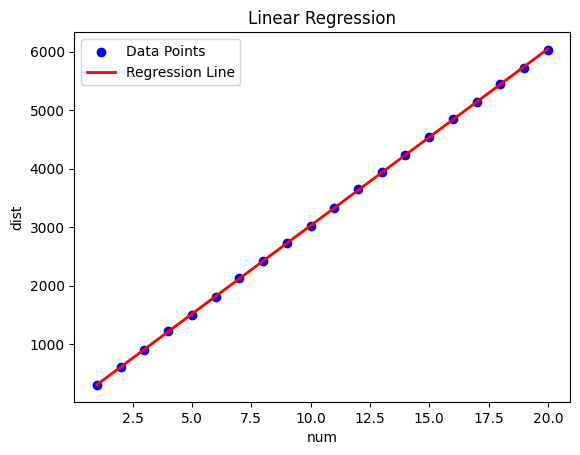

In [6]:
import pandas as pd
from io import StringIO
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
csv_data = '''num range width
1 87.74 302.703
2 90.43 311.9835
3 84.97 293.1465
4 90.13 310.9485
5 81.91 282.5895
6 88.77 306.2565
7 91.24 314.778
8 87.81 302.9445
9 87.02 300.219
10 85.72 295.734
11 90.74 313.053
12 90.34 311.673
13 85.98 296.631
14 86.24 297.528
15 86.35 297.9075
16 89.56 308.982
17 85.63 295.4235
18 89.59 309.0855
19 80.08 276.276
20 88.36 304.842'''

# 将CSV数据转换为DataFrame
df = pd.read_csv(StringIO(csv_data), sep='\s+')

df['dist'] = df['width'].cumsum()
print(df)

# 提取自变量和因变量
X = df['num'].values.reshape(-1, 1)
y = df['dist'].values.reshape(-1, 1)

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

y_pred = model.predict(X)
# 输出回归结果
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
# 绘制散点图和回归线
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('num')
plt.ylabel('dist')
plt.title('Linear Regression')
plt.legend()
plt.show()